## Telco Customer Churn Dataset

20180594 이정훈

- 과제 4에서 정리한 자료를 이용하여 decision tree와 ensemble 모형을 훈련한다.
- 표본을 훈련자료와 검증자료로 나누어 검증자료에 대한 예측력을 기준으로 모형들을 비교한다.

### 1 Data Import

> 과제 4번에서 preprocessing한 데이터를 불러온다

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import pickle
data = pd.read_pickle('churn.pkl')

In [2]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,29.85,29.85,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,56.95,1889.50,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,2.0,1.0,1.0,53.85,108.15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,42.30,1840.75,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,1.0,70.70,151.65,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,24.0,1.0,1.0,84.80,1990.50,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7039,0.0,0.0,1.0,1.0,72.0,1.0,1.0,103.20,7362.90,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7040,0.0,0.0,1.0,1.0,11.0,0.0,1.0,29.60,346.45,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7041,1.0,1.0,1.0,0.0,4.0,1.0,1.0,74.40,306.60,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


### 2 Decision tree

1. GridSearchCV로 max_depth와 ccp_alpha 최적값을 찾는다.
2. Test data를 이용해 training data로 훈련한 최적모형의 성과를 확인한다.

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score

X = data.drop(columns = 'Churn_Yes')
y = data['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [4]:
tree = DecisionTreeClassifier()
hyperparameters = {'criterion' : ['gini', 'entropy'],
                   'max_depth' : [1,2,3,4,5,6,7,8,9,10,20],
                   'ccp_alpha' : [0.001, 0.01, 0.1, 1, 10]}

gsearch = GridSearchCV(tree, hyperparameters, verbose = 1, scoring = "recall")
gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1, 1, 10],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]},
             scoring='recall', verbose=1)

In [5]:
model = DecisionTreeClassifier(**gsearch.best_params_)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=3)

In [6]:
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81      1549
         1.0       0.49      0.61      0.55       561

    accuracy                           0.73      2110
   macro avg       0.67      0.69      0.68      2110
weighted avg       0.75      0.73      0.74      2110



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

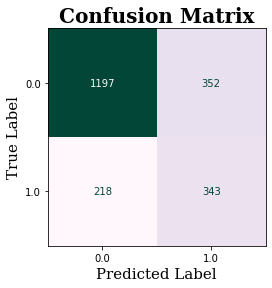

In [7]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

test data에 대해서 recall 점수가 61%가 나왔다. 단순한 모델이지만 괜찮은 성능을 보여주었다.

### 3 Ensemble
####  Bagging
- 적당한 weak learner를 선택하여 random foreset 모형을 훈련시키고 test set에 대한 검증결과를 confusion matrix로 정리한다.

#### Random Forest

In [8]:
from sklearn.preprocessing import MinMaxScaler
features = X_train.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_train.columns = features

features = X_test.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns = features

In [9]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
forest = RandomForestClassifier()
hyperparameters = {'criterion' : ['gini', 'entropy'],
                   'max_depth' : [1,2,3,4,5,6,7,8,9,10,20],
                   'ccp_alpha' : [0.001, 0.01, 0.1, 1, 10]}

gsearch = GridSearchCV(forest, hyperparameters, verbose = 1, scoring = "recall")
gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1, 1, 10],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]},
             scoring='recall', verbose=1)

In [10]:
model = RandomForestClassifier(**gsearch.best_params_)
model.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9)

In [11]:
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1549
         1.0       0.66      0.47      0.55       561

    accuracy                           0.80      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.80      0.78      2110



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

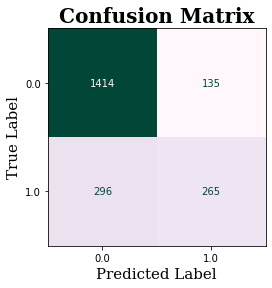

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

#### Bagging

In [13]:
weak_learner = DecisionTreeClassifier(max_features = "auto", max_leaf_nodes = 32)
bagging = BaggingClassifier(weak_learner)
hyperparameters = {'n_estimators' : np.arange(0,1000,20),
                   'max_samples' : [0.1,1.0,10,100],
                   'bootstrap' : [True, False],
                   'n_jobs' : [-1]}

gsearch = GridSearchCV(bagging, hyperparameters, verbose = 1, scoring = "recall")
gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 297, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 356, in _fit
    self._validate_estimator()
  Fi

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='auto',
                                                                               max_leaf_nodes=32)),
             param_grid={'bootstrap': [True, False],
                         'max_samples': [0.1, 1.0, 10, 100],
                         'n_estimators': array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500,
       520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760,
       780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980]),
                         'n_jobs': [-1]},
             scoring='recall', verbose=1)

In [14]:
model = BaggingClassifier(weak_learner, **gsearch.best_params_)
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='auto',
                                                        max_leaf_nodes=32),
                  bootstrap=False, n_estimators=140, n_jobs=-1)

In [15]:
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1549
         1.0       0.68      0.43      0.52       561

    accuracy                           0.79      2110
   macro avg       0.75      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

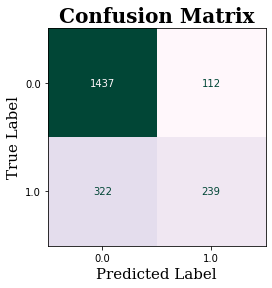

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

### 4  Adaboost
- 적당한 weak learner를 선택하여 Adaboost 모형을 훈련시키고 test set에 대한 검증결과를 confusion matrix로 정리한다.

In [26]:
from sklearn.ensemble import AdaBoostClassifier

weak_learner = DecisionTreeClassifier(max_depth = 1)
adaboost = AdaBoostClassifier(weak_learner)
hyperparameters = {'n_estimators': [50,100,300,500],
              'learning_rate': [0.01,0.1,1],
              'algorithm': ['SAMME', 'SAMME.R']}

gsearch = GridSearchCV(adaboost, hyperparameters, verbose = 1, scoring = "recall")
gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 300, 500]},
             scoring='recall', verbose=1)

In [27]:
model = AdaBoostClassifier(weak_learner, **gsearch.best_params_)
model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1)

In [28]:
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1549
         1.0       0.62      0.56      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.73      2110
weighted avg       0.79      0.79      0.79      2110



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

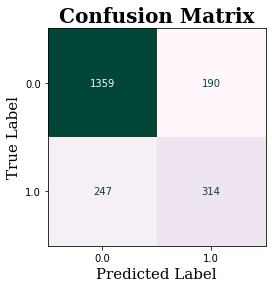

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

### 5 XGBoost
- 적당한 weak learner를 선택하여 XGBoost 모형을 훈련시키고 test set에 대한 검증결과를 confusion matrix로 정리한다.

In [25]:
import xgboost as xgb 
from xgboost import plot_importance, XGBClassifier

In [34]:
XGB = XGBClassifier()
hyperparameters = {'min_child_weight': [1],
                   'gamma': [0.1,1],
                   'subsample': [0.6, 0.8, 1.0],
                   'max_depth': [3, 4, 5],
                   'learning_rate' : [0.001,0.01,0.1,1], 
                   'n_estimators' : [50,100,300,600]}

gsearch = GridSearchCV(XGB, hyperparameters, verbose = 1, scoring = "recall")
gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.1, 1],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1],
                         'n_estimators': [50, 100, 300, 600],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='recall', verbose=1)

In [35]:
model = XGBClassifier(**gsearch.best_params_)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [36]:
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1549
         1.0       0.64      0.53      0.58       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

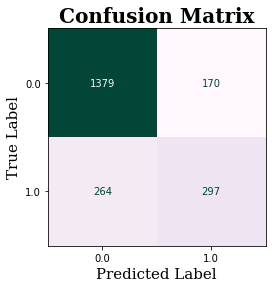

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap = 'PuBuGn', colorbar = False) 
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

### 6 Stacking
- 적당한 base 모형과 meta 모형을 선택하여 stacking 모형을 훈련시키고 test set에 대한 검증결과를 confusion matrix로 정리한다.

In [52]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
logistic = LogisticRegression(C=510.204081632653, penalty='l1', solver='liblinear')
MNB = MultinomialNB()
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1)
#XGB = XGBClassifier(base_score=0.5, booster='gbtree', feature_types=None, 
                     # gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300)
tree = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=3)

tree.fit(X_train, y_train)
logistic.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
MNB.fit(X_train, y_train)
#XGB.fit(X_train, y_train)

MultinomialNB()

In [53]:
logistic_pred = logistic.predict(X_train)
adaboost_pred = adaboost.predict(X_train)
MNB_pred = MNB.predict(X_train)
#XGB_pred = XGB.predict(X_train)
tree_pred = tree.predict(X_train)

In [54]:
train = np.array([logistic_pred, adaboost_pred, MNB_pred, tree_pred])
train = np.transpose(train)

In [55]:
LGBM = LGBMClassifier()
LGBM.fit(train, y_train)

LGBMClassifier()

In [56]:
logistic_test = logistic.predict(X_test)
adaboost_test = adaboost.predict(X_test)
MNB_test = MNB.predict(X_test)
#XGB_test = XGB.predict(X_test)
tree_test = tree.predict(X_test)

predict_value = np.array([logistic_test, adaboost_test, MNB_test, tree_test])
predict_value = np.transpose(predict_value)

predicted = LGBM.predict(predict_value)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1549
         1.0       0.62      0.59      0.61       561

    accuracy                           0.80      2110
   macro avg       0.74      0.73      0.73      2110
weighted avg       0.79      0.80      0.79      2110



Text(0.5, 1.0, 'Confusion Matrix')

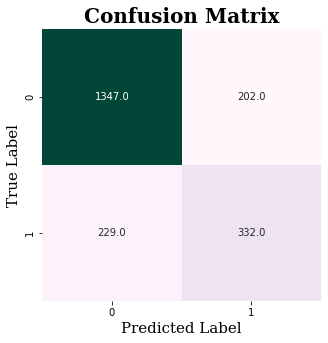

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize = (5,5))
matrix = confusion_matrix(y_test, predicted)
sns.heatmap(matrix, annot=True,fmt='.1f', cmap = 'PuBuGn', cbar = False)
plt.xlabel('Predicted Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.ylabel('True Label', fontsize = 15, fontweight='light', fontfamily='Serif')
plt.title('Confusion Matrix', fontsize = 20, fontweight='bold', fontfamily='Serif')

- 과제 4와 5에서 사용했던 model들의 best parameter값을 가져와 학습시킨 결과, 정확도가 비약적으로 상승하였다
- score였던 클래스 1의 recall 값이 0.59정도로 나쁘지 않는 분류 성능을 보여준다